In [1]:
from utils.binaries import *
from utils.plotting import *

import pickle

08:46:10 (  +561ms) [INFO   ] -- import logging
08:46:10 (  +165ms) [INFO   ] -- import numpy as np
08:46:10 (    +6ms) [INFO   ] -- import uncertainties
08:46:10 (  +291ms) [INFO   ] -- import pandas as pd
08:46:10 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
08:46:10 (    +1ms) [INFO   ] -- import binaries.tools as tools
08:46:11 (  +339ms) [INFO   ] -- import matplotlib.pyplot as plt
08:46:11 (  +406ms) [INFO   ] -- import seaborn as so
08:46:11 (    +2ms) [INFO   ] -- import plotting.tools as plot
08:46:11 (    +8ms) [DEBUG  ] -- font size set to 9.5
08:46:11 (    +1ms) [DEBUG  ] -- label size set to 13.0
08:46:11 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
08:46:11 (    +0ms) [DEBUG  ] -- markersize set to 2.0
08:46:11 (    +1ms) [DEBUG  ] -- usetex set to False


In [3]:
with open('/cr/data01/filip/Data/muonAcquisition/peakPowerLaw/muonAcq.plateau', 'rb') as f:
    muonAcq_plateau = pickle.load(f)

with open('/cr/data01/filip/Data/muonAcquisition/peakPowerLaw/T3.plateau', 'rb') as f:
    T3_plateau = pickle.load(f)

with open('/cr/data01/filip/Data/muonAcquisition/peakPowerLaw/muonAcq.mip', 'rb') as f:
    muonAcq_mip = pickle.load(f)

with open('/cr/data01/filip/Data/muonAcquisition/peakPowerLaw/T3.mip', 'rb') as f:
    T3_mip = pickle.load(f)

In [4]:
names = {
    '643' : 'Borbaran',
    '1823' : 'Redondo Jr.',
    '1844' : 'Ruso Jr.',
    '1839' : 'Czech Republic',
    '1845' : 'Louisana',
    '1840' : 'Italy Jr.',
    '659' : 'El Mataco',
    '660' : 'El Cenizo',
}

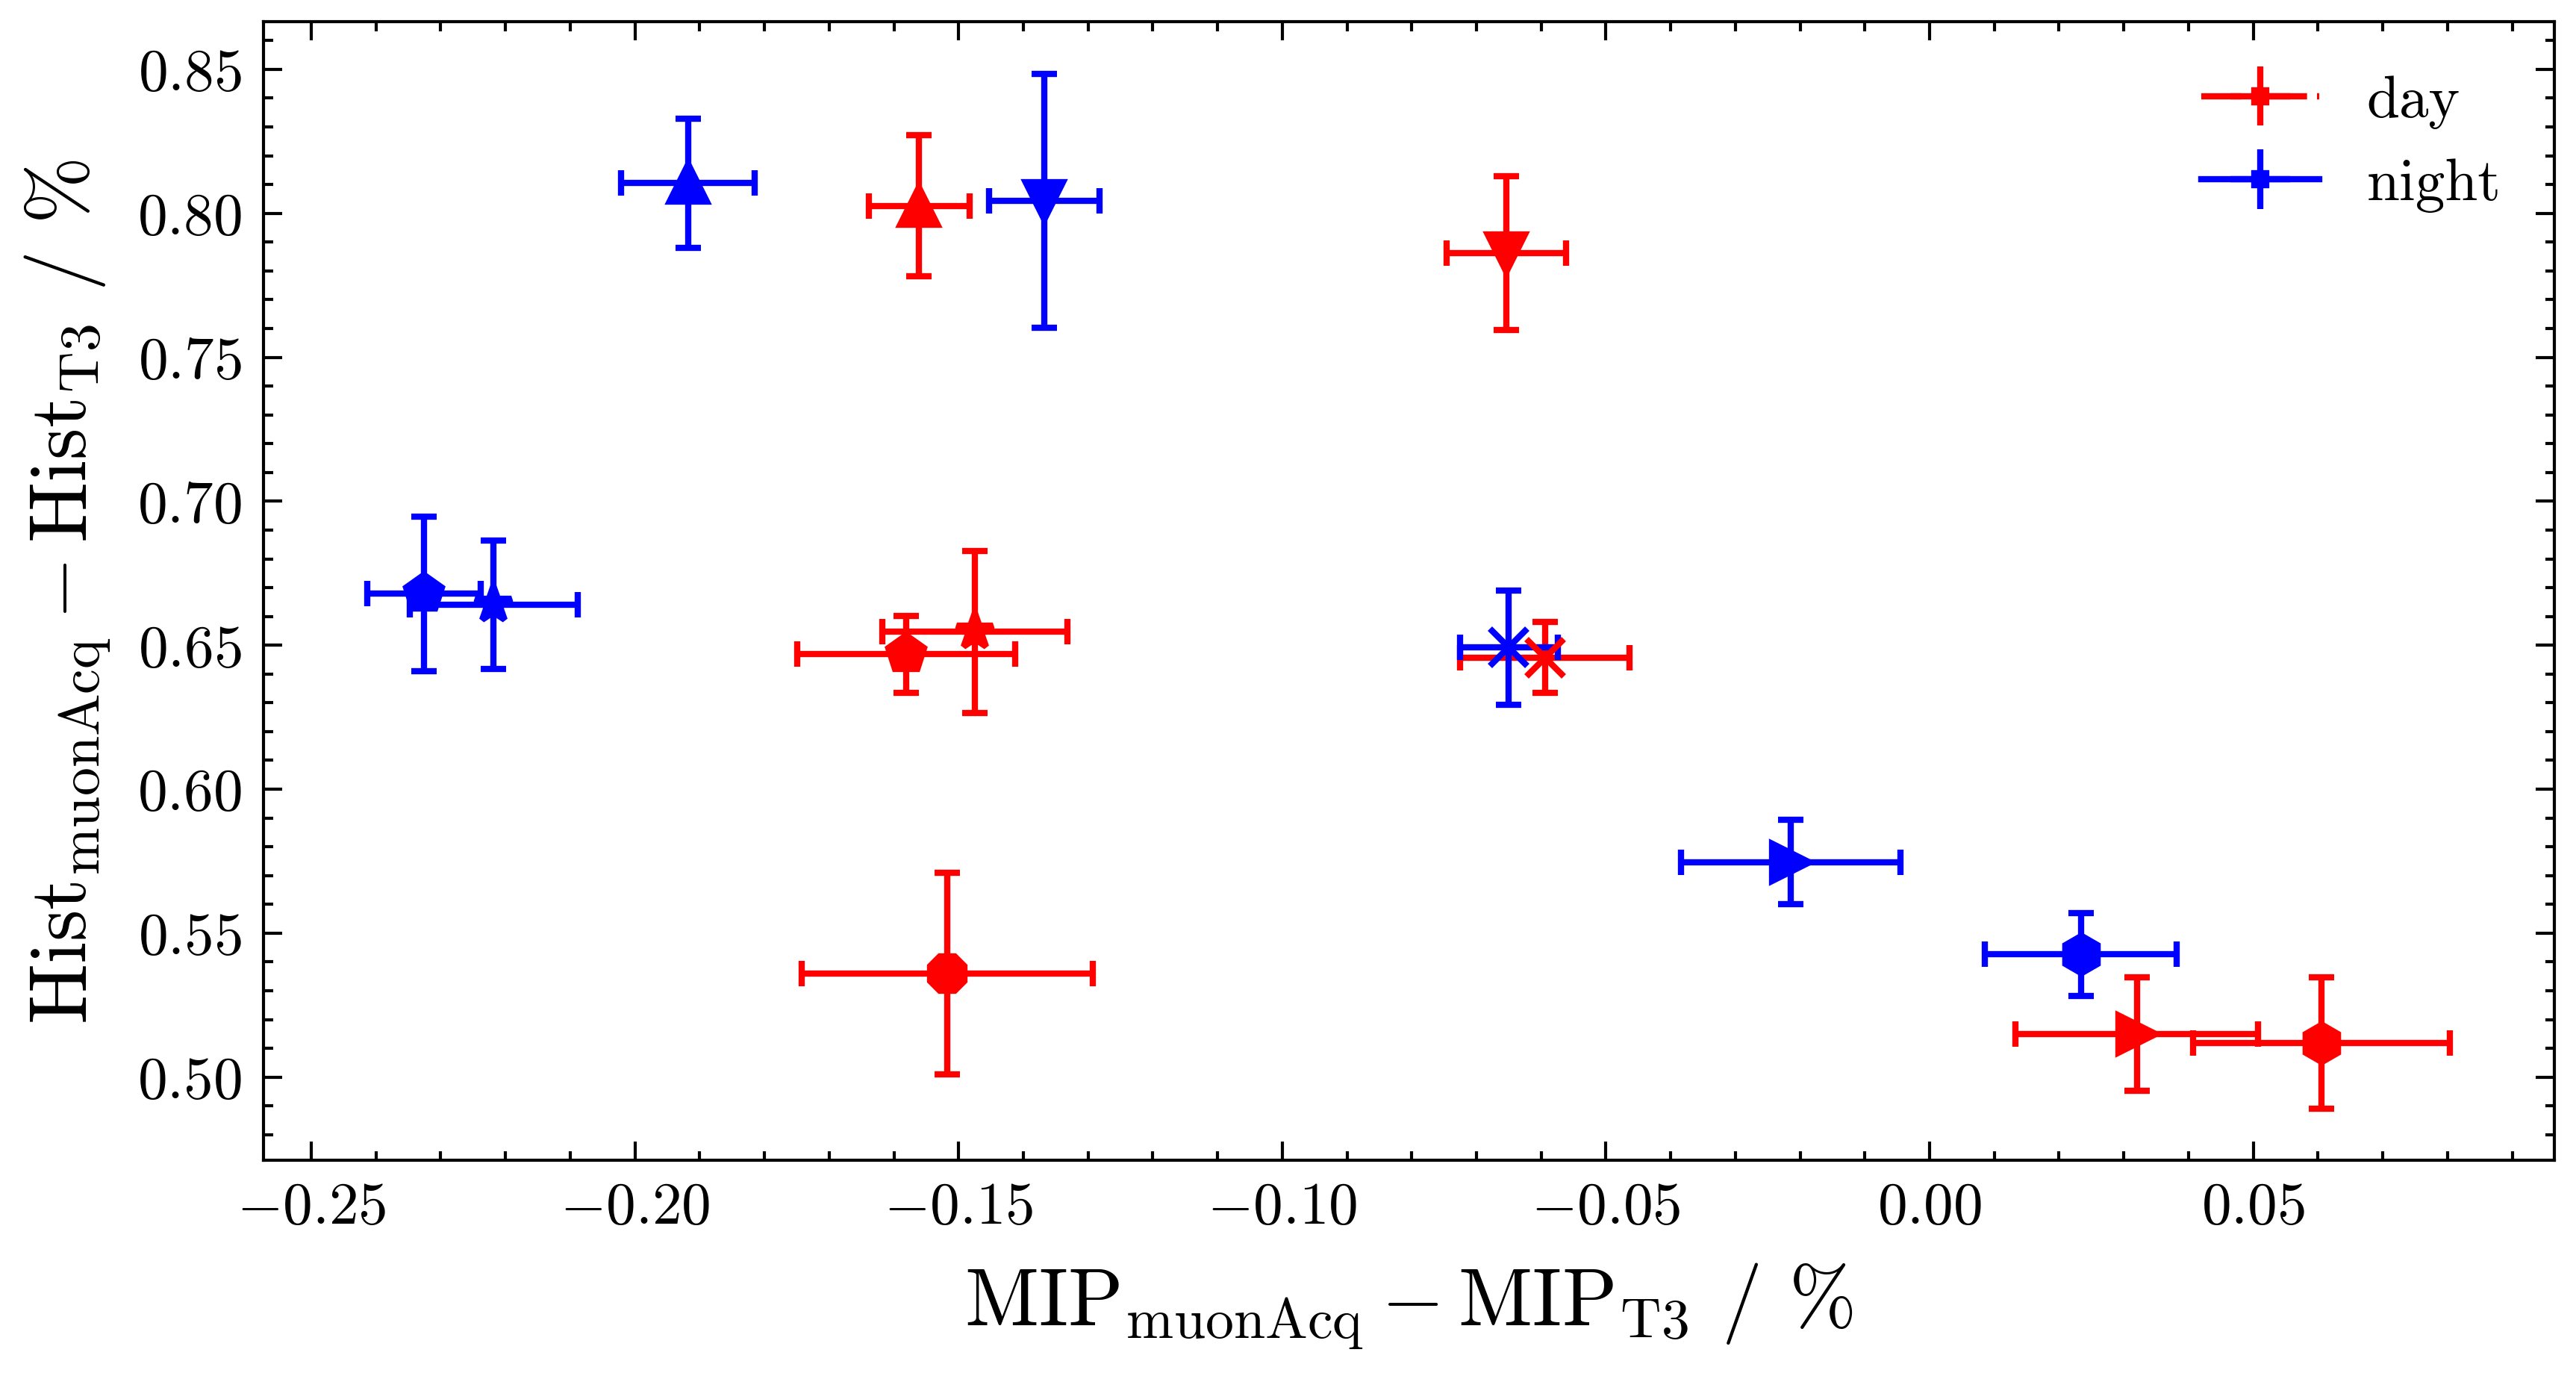

In [33]:
markers = {
    '660' : 'X', 
    '643' : '>', 
    '1823' : '*', 
    '1844' : 'v', 
    '1839' : '^', 
    '1845' : 'p', 
    '1840' : 'h', 
    '659' : 'x',
}

correction_factors = {'day' : {}, 'night' : {}}

for key in names.keys():
    marker = markers[key]
    for dir in ['day', 'night']:
        color = 'r' if dir == "day" else 'b'

        try:
            T3_x, T3_y = np.mean(T3_mip[dir][key]), np.mean(T3_plateau[dir][key])
            mA_x, mA_y = np.mean(muonAcq_mip[dir][key]), np.mean(muonAcq_plateau[dir][key])

            x = (mA_x - T3_x) / mA_x
            dx = np.sqrt( np.std(T3_mip[dir][key])**2/mA_x**2 + (T3_x/mA_x**2)**2 * np.std(muonAcq_mip[dir][key])**2 )
            y = (mA_y - T3_y) / mA_y
            dy = np.sqrt( np.std(T3_plateau[dir][key])**2/mA_y**2 + (T3_y/mA_y**2)**2 * np.std(muonAcq_plateau[dir][key])**2 )

            plt.errorbar(x, y, dx, dy, ls=None, capsize=2, c=color, marker=marker, markersize=6)
            correction_factors[dir][key] = x
        except KeyError: continue

plt.errorbar([], [], [], [], ls=None, capsize=2, c='r', label='day', marker='s')
plt.errorbar([], [], [], [], ls=None, capsize=2, c='b', label='night', marker='s')
plt.ylabel('$\mathrm{Hist}_\mathrm{muonAcq} - \mathrm{Hist}_\mathrm{T3}$ / %')
plt.xlabel('$\mathrm{MIP}_\mathrm{muonAcq} - \mathrm{MIP}_\mathrm{T3}$ / %')
plt.legend()

In [35]:
with open('/cr/data01/filip/Data/muonAcquisition/peakPowerLaw/correction_factors.pkl', 'wb') as f:
    pickle.dump(correction_factors, f)